In [2]:
intro_images_path='../dataset_part1/Images/Intro_images/'
edge_images_path='../dataset_part1/Images/Edge_images/'
seg_images_path='../dataset_part1/Images/Seg_images/'
feature_images_path='../dataset_part1/Images/Feature_images/'
output_path='./Images/Outputs/'
print('Image paths ....')

Image paths ....


# COMPUTER VISION I

**Master in Artificial Intelligence, USC, UDC, UVigo**

Academic year 2023/24


<img src="./Logotipo_Solo.png" width=200/>

## Image Processing

- Arithmetic and logical operation
- Histogram equalization
- Convolution
- Correlation
- Image pyramids
- Template matching



http://szeliski.org/Book/

### Image difference 

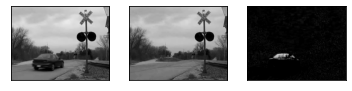

In [2]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

bg = cv2.imread(intro_images_path+'background.png',0)
fg = cv2.imread(intro_images_path+'foreground.png',0)

motion =np.absolute(cv2.subtract(fg,bg))

plt.subplot(131), plt.imshow(fg, 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(bg,'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(motion, 'gray')
plt.xticks([]), plt.yticks([])
#plt.subplot(224), plt.plot(hist_full)
plt.show()

### Exercise Histogram Equalization in OpenCV

https://docs.opencv.org/3.4.2/d5/daf/tutorial_py_histogram_equalization.html

OpenCV has a function to do that, cv2.equalizeHist(). Its input is just a grayscale image and the output is the histogram-equalized image. You can take different images with different light conditions, equalize them and check the results.

Histogram equalization is good when the histogram of an image is confined to a particular region. It doesn’t work on images where both bright and dark pixels are present. In those cases an adaptive equalization is more convinient.


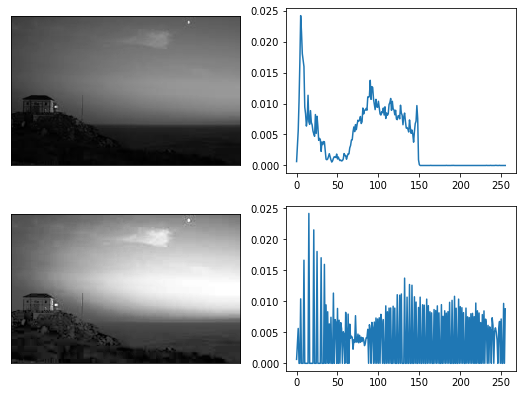

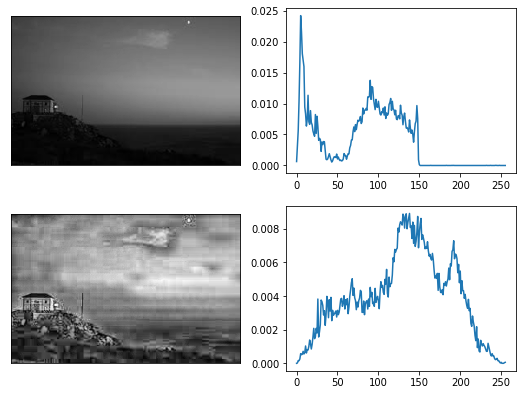

In [3]:
img = cv2.imread(intro_images_path+'fisterra_gray.jpg',0)
equ = cv2.equalizeHist(img)
#res = np.hstack((img,equ)) #stacking images side-by-side
#cv2.imwrite('fisterra_gray_eq.png',res)

plt.figure(figsize= (0.05*img.shape[0],0.05*img.shape[1]))
plt.subplot(421), plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([]) 
plt.subplot(423), plt.imshow(equ,'gray')
plt.xticks([]), plt.yticks([])


hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist_norm=hist/img.size
plt.subplot(422), plt.plot(hist_norm)
hist = cv2.calcHist([equ],[0],None,[256],[0,256])
hist_norm=hist/equ.size
plt.subplot(424), plt.plot(hist_norm)

plt.show()

plt.figure(figsize= (0.05*img.shape[0],0.05*img.shape[1]))
plt.subplot(425), plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([]) 
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist_norm=hist/img.size
plt.subplot(426), plt.plot(hist_norm)

#Adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(16,16))
cl1 = clahe.apply(img)
plt.subplot(427), plt.imshow(cl1,'gray')
plt.xticks([]), plt.yticks([]) 

hist = cv2.calcHist([cl1],[0],None,[256],[0,256])
hist_norm=hist/cl1.size
plt.subplot(428), plt.plot(hist_norm)

plt.show()

## Convolution and Correlation

### Convolution filtering

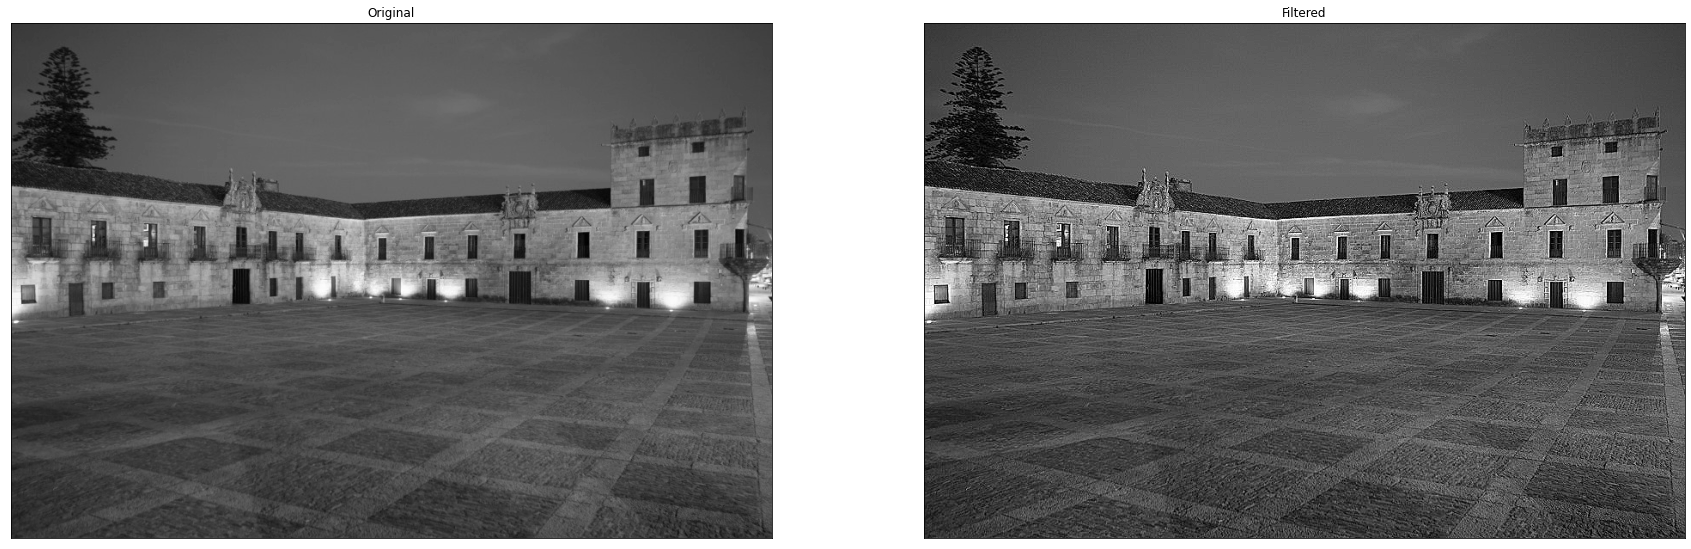

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(intro_images_path+'pazo.jpg',0)
kernel = np.array([[0, -1, 0], [-1, 5, -1],[0, -1,0]]) 
dst = cv2.filter2D(img,0,kernel)

plt.figure(figsize= (0.05*img.shape[0],0.05*img.shape[1]))
plt.subplot(121),plt.imshow(img,'gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,'gray'), plt.title('Filtered')
plt.xticks([]), plt.yticks([])
plt.show()
#cv2.imwrite('pazo.jpg',img)


### Convolution for image smoothing (blurring)

Image blurring is achieved by convolving the image with a low-pass filter kernel taht removes high frequency content (eg: noise, edges). Edges are blurred a little bit in this operation. There are several blurring techniques:

***Mean filtering:***

The idea of mean filtering is simply to replace each pixel value in an image with the mean value of its neighbors, including itself. 
This is done in by convolving an image with a normalized box filter. Opencv provide us with the function **cv.blur()**, which takes the width and height of the kernel as parameters. A 3x3 normalized box filter would look like the below:

    K=[[1/9 1/9 1/9],
       [1/9 1/9 1/9],
       [1/9 1/9 1/9]]
       
 ***Gaussian average***

In Gaussian Blur operation, the image is convolved with a Gaussian filter instead of the box filter. Opencv provide us with the **GaussianBlur(src, dst, ksize, sigma)** method, which accepts the following parameters −

    src − input image

    dst − output image)

    ksize − size of the kernel.

    sigmaX − Gaussian kernel standard deviation in X and Y directions.


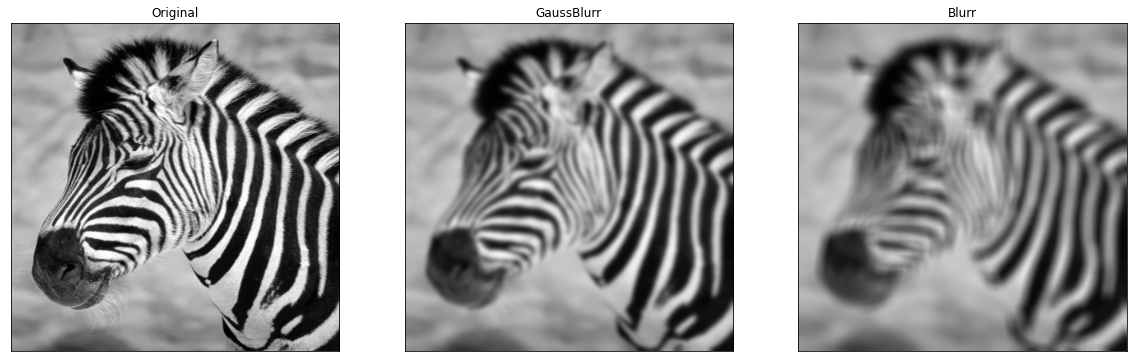

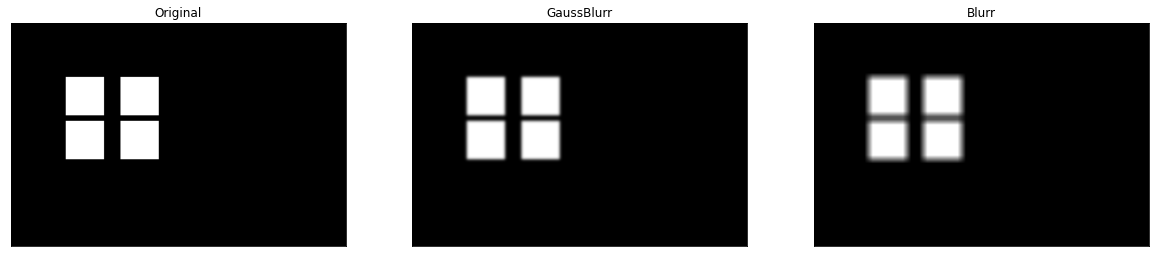

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(intro_images_path+'zebra.jpg')

blur1 = cv2.GaussianBlur(img,(15,15),0)
blur2 = cv2.blur(img,(15,15))

plt.figure(figsize= (0.05*img.shape[0],0.05*img.shape[1]))
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur1,'gray'),plt.title('GaussBlurr')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur2),plt.title('Blurr')
plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite('zebragb.jpg',blur1)
cv2.imwrite('zebrab.jpg',blur2)


img = cv2.imread(intro_images_path+'gate.jpg')

img2 = np.zeros(img.shape[:2], np.uint8)
img2[100:170, 100:170] = 255
img2[180:250, 100:170] = 255
img2[100:170, 200:270] = 255
img2[180:250, 200:270] = 255
blur1 = cv2.GaussianBlur(img2,(15,15),0)
blur2 = cv2.blur(img2,(15,15))

plt.figure(figsize= (0.05*img2.shape[0],0.05*img2.shape[1]))
plt.subplot(131),plt.imshow(img2,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur1,'gray'),plt.title('GaussBlurr')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur2,'gray'),plt.title('Blurr')
plt.xticks([]), plt.yticks([])
plt.show()

### Correlation filtering

**Exercise: Template Matching**
https://docs.opencv.org/3.4.2/d4/dc6/tutorial_py_template_matching.html

Template Matching is a method to find certain image content (template) in another image. OpenCV comes with a function cv2.matchTemplate() for this purpose. It simply slides the template image (T) over the input image (I), as in 2D correlation, and compares the template against each patch of the input image to give the image (R). Several comparison methods are implemented in OpenCV. They return a grayscale image (R), where each pixel denotes how much does the neighbourhood of that pixel match with template.

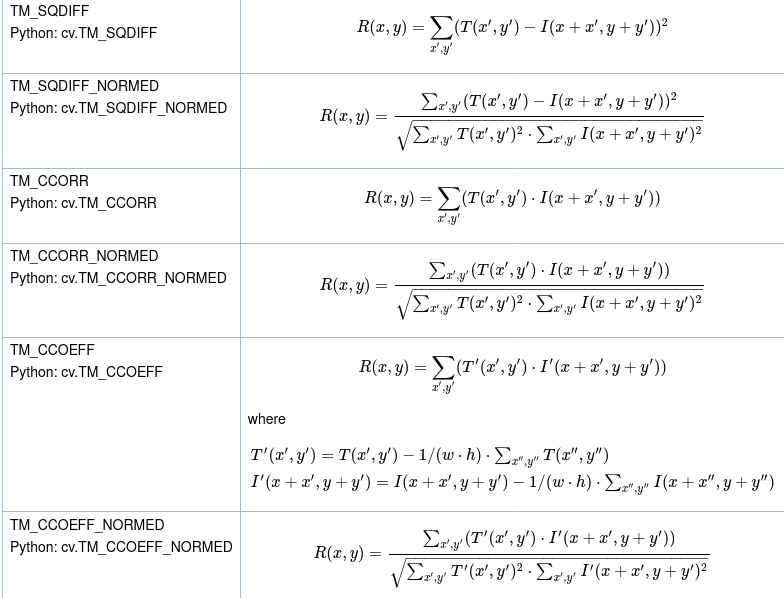


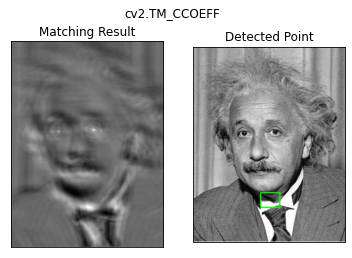

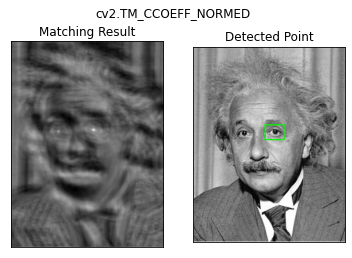

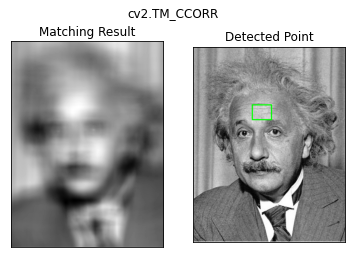

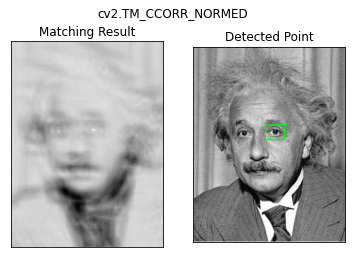

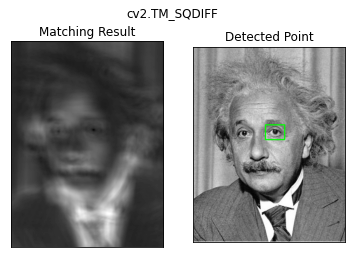

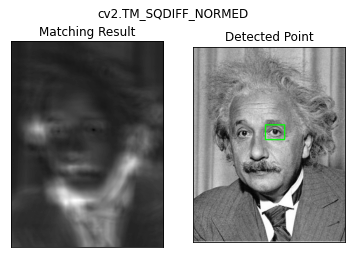

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(intro_images_path+'einstein.jpg',0)
img2 = img.copy()
template = cv2.imread(intro_images_path+'einstein_eye.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    cv2.rectangle(img,top_left, bottom_right, [0,255,0], 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
    if method in [cv2.TM_CCOEFF_NORMED]:
      res=(res-min_val)/(max_val-min_val)*255
      cv2.imwrite('einstein_ccoeff_normed.jpg',res)

## Image Pyramids


An image pyramid is a collection of images usually obtained by downsampling a single original image. It is a set of layers in which the higher the layer, the smaller the size.


Image pyramids are used to achieve scale-invariant processing in contexts as the following:
- template matching
- interest point detection
- object detection


http://szeliski.org/Book/



### Gaussian pyramid

The basic steps in building a Gaussian image pyramid are:
- Gaussian smooth the image
- Reduce image dimensions by half by discarding every other row and and every other column
- Repeat this process until desired numbers levels are achieved or the image size reached a minimun




#### Exercise

Comparison between pyramids with and without smoothing prior to downscaling

(491, 383)


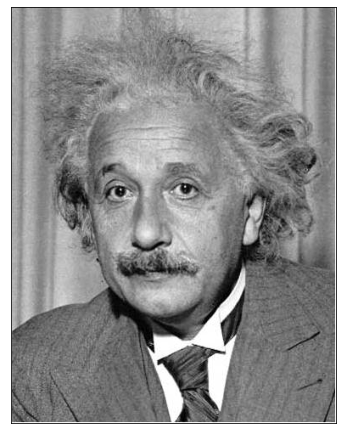

(246, 192)


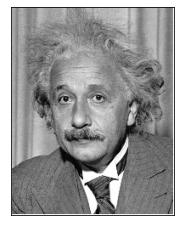

(123, 96)


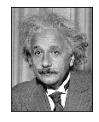

(62, 48)


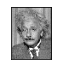

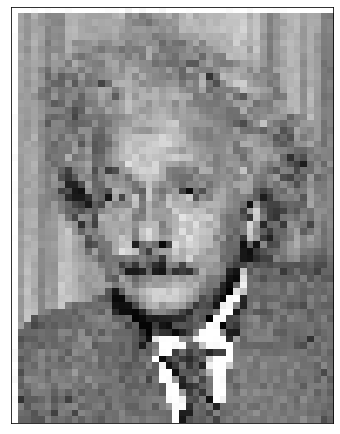

(491, 383)


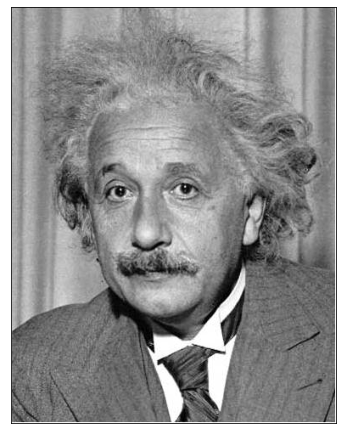

(246, 192)


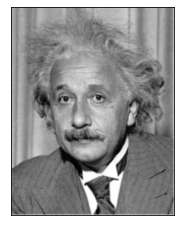

(123, 96)


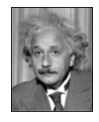

(62, 48)


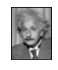

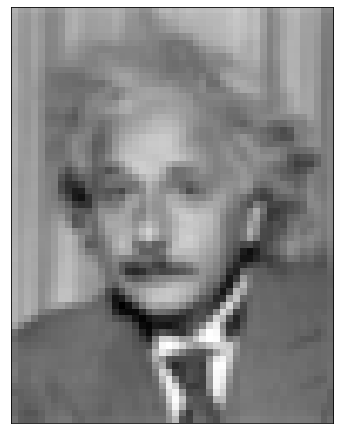

In [9]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from skimage import data

def pyramid_bf(image,l=5, minSizex=8, minSizey=8):
# yield the original image
    level=0
    yield image
    # keep looping over the pyramid
    while True:
        if level==l or image.shape[0]<minSizex or image.shape[1]<minSizey:
            break
        h,w=image.shape[:2]
        image=image[:h+1:2,:w+1:2]
        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        # yield the next image in the pyramid
        yield image
        level=level+1
            
            
def pyramid_sm(image,l=5, minSizex=8, minSizey=8):
    level=0
    yield image
    while True:
        if level==l or image.shape[0]<minSizex or image.shape[1]<minSizey:
            break
        image = cv2.GaussianBlur(image,(5,5),0)
        h,w=image.shape[:2]
        image=image[:h+1:2,:w+1:2]
        
        yield image
        level=level+1

image = cv2.imread(intro_images_path + 'einstein.jpg',0)#'aliasing.jpg',0)#

for layer in pyramid_bf(image,l=3):
    print(layer.shape)
    plt.figure(figsize= (0.02*layer.shape[0],0.02*layer.shape[1]))
    plt.imshow(layer,cmap='gray')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

plt.figure(figsize= (0.02*image.shape[0],0.02*image.shape[1]))
plt.imshow(layer,cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()

for layer in pyramid_sm(image, l=3):
    print(layer.shape)
    plt.figure(figsize= (0.02*layer.shape[0],0.02*layer.shape[1]))
    plt.imshow(layer,cmap='gray')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

plt.figure(figsize= (0.02*image.shape[0],0.02*image.shape[1]))
plt.imshow(layer,cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()


**Opencv function**

OpenCV has a specific function to downscale images:

(491, 383)


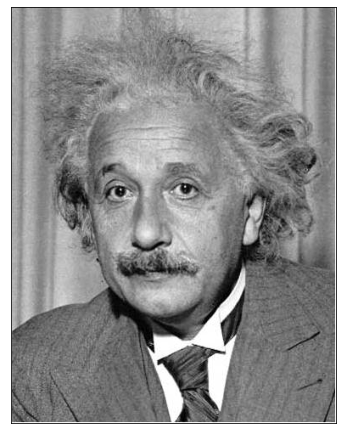

(491, 383)
(246, 192)


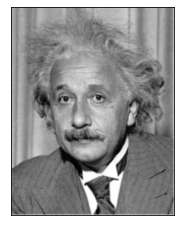

(123, 96)


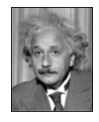

(62, 48)


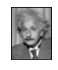

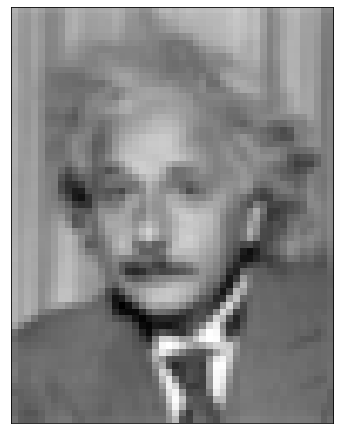

In [10]:
def pyramid(layer, l=4, minSizex=8, minSizey=8):
    level=0
    yield layer
    print(layer.shape)
    while True:
        layer = cv2.pyrDown(layer)
        if level== l or layer.shape[0]<minSizex or layer.shape[1]<minSizey:
            break
        yield layer
        level=level+1
        
for layer in pyramid(image, l=3):
    print(layer.shape)
    plt.figure(figsize= (0.02*layer.shape[0],0.02*layer.shape[1]))
    plt.imshow(layer,cmap='gray')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

plt.figure(figsize= (0.02*image.shape[0],0.02*image.shape[1]))
plt.imshow(layer,cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.show()


### Example of application: Template Matching

https://docs.opencv.org/3.4.2/d4/dc6/tutorial_py_template_matching.html

Template Matching is a method for searching and finding the location of a template image in a larger image. In order to cope with different sizes of the occurrence of the template we can take advantage of image pyramid.



### EXERCISE: Template matching and Gaussian pyramid

Based on the exercises about template matching and the construction of Gaussian pyramids try to detect as much tunas as posible in the image Tuna_Relative_Sizes.jpg given the template in Tuna_template.jpg.

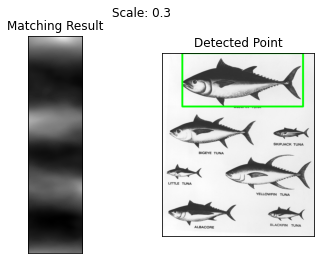

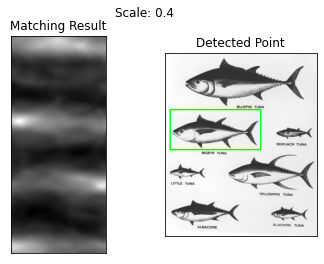

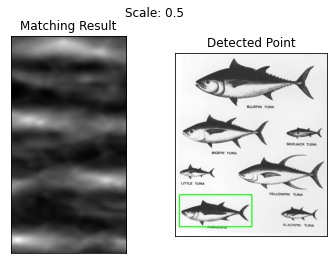

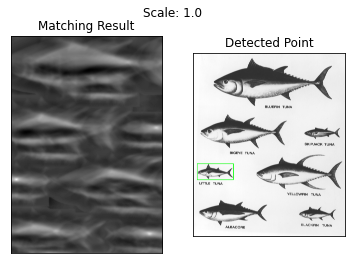

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_object_in_image(image, template):
    img = cv2.imread(image, 0)
    template = cv2.imread(template, 0)
    w, h = template.shape[::-1]

    # Iterar sobre escalas
    for scale in [0.3, 0.4,0.5, 1.0]:  # Puedes ajustar las escalas según sea necesario
        resized_img = cv2.resize(img, (int(img.shape[1] * scale), int(img.shape[0] * scale)))
        img2 = resized_img.copy()

        # Aplicar coincidencia de plantillas con el método cv2.TM_CCOEFF_NORMED
        method = cv2.TM_CCOEFF_NORMED
        res = cv2.matchTemplate(img2, template, method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        # Obtener ubicación de la coincidencia
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        # Dibujar rectángulo en la imagen original
        img_color = cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB)
        cv2.rectangle(img_color, top_left, bottom_right, [0, 255, 0], 10)

        # Mostrar resultados
        plt.subplot(121), plt.imshow(res, cmap='gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122), plt.imshow(img_color, cmap='gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(f'Scale: {scale}')
        plt.show()

# Rutas de las imágenes
image_path = intro_images_path+'Tuna_Relative_Sizes.jpg'
template_path = intro_images_path+'Tuna_template.jpg'

# Llamar a la función con las rutas de las imágenes
detect_object_in_image(image_path, template_path)



Image Shape: (3564, 2971)
Layer Shape: (3564, 2971)
Max Val: 0.9999579787254333
Min Val: 0.7267501950263977
Max Loc: (81, 2155)
Min Loc: (633, 204)


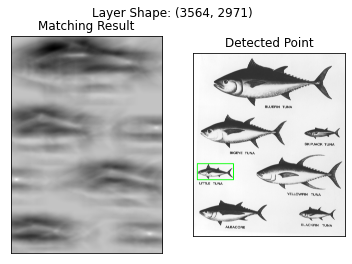

Layer Shape: (3564, 2971)
Max Val: 0.9720664024353027
Min Val: 0.0
Max Loc: (2073, 2965)
Min Loc: (81, 2155)


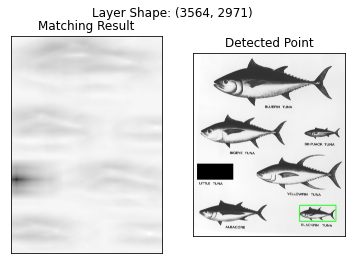

Layer Shape: (3564, 2971)
Max Val: 0.9626471400260925
Min Val: 0.0
Max Loc: (2170, 1383)
Min Loc: (81, 2155)


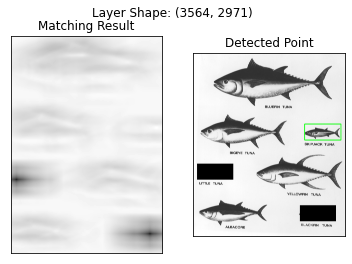

Layer Shape: (3564, 2971)
Max Val: 0.946025550365448
Min Val: 0.0
Max Loc: (1435, 906)
Min Loc: (2170, 1383)
Layer Shape: (1782, 1486)
Max Val: 0.9753584861755371
Min Val: 0.802568256855011
Max Loc: (44, 1381)
Min Loc: (282, 169)


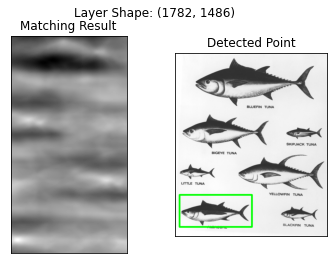

Layer Shape: (1782, 1486)
Max Val: 0.9519636034965515
Min Val: 0.0
Max Loc: (644, 980)
Min Loc: (44, 1381)


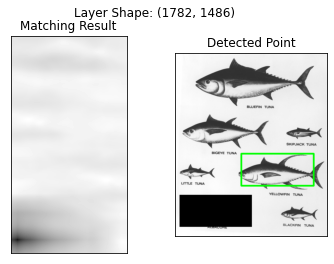

Layer Shape: (1782, 1486)
Max Val: 0.9498739838600159
Min Val: 0.0
Max Loc: (117, 571)
Min Loc: (644, 980)


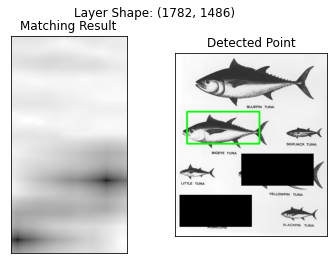

Layer Shape: (1782, 1486)
Max Val: 0.9426793456077576
Min Val: 0.0
Max Loc: (750, 1396)
Min Loc: (117, 571)
Layer Shape: (891, 743)
Max Val: 0.9441927075386047
Min Val: 0.8600358963012695
Max Loc: (40, 0)
Min Loc: (32, 92)


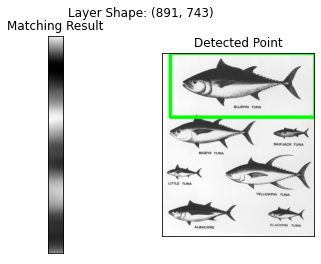

Layer Shape: (891, 743)
Max Val: 0.931411623954773
Min Val: 0.0
Max Loc: (40, 414)
Min Loc: (40, 0)
(446, 372)
312 703
break for


In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def pyramid_bf(image, l=5, minSizex=8, minSizey=8):
    level = 0
    yield image
    while True:
        if level == l or image.shape[0] < minSizex or image.shape[1] < minSizey:
            break

        image = cv2.GaussianBlur(image,(5,5),0)
        h, w = image.shape[:2]
        image = image[:h+1:2, :w+1:2]
        yield image
        level += 1
methods=['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

def detect_object_in_pyramid(image_path, template_path):
    template = cv2.imread(template_path, 0)
    w, h = template.shape[::-1]

    # Cargar la imagen como un arreglo NumPy
    image = cv2.imread(image_path, 0)
    
    print(f'Image Shape: {image.shape}')
    # Generar pirámide de la imagen
    for layer in pyramid_bf(image, l=3):
        deteccion=True
        break_for=False
        contador=0
        while deteccion:

            copia_img=layer.copy()
            # Convertir la capa a un arreglo NumPy
            layer_np = np.array(layer)

            # Verificar dimensiones antes de la coincidencia de plantillas
            if layer_np.shape[0] < h or layer_np.shape[1] < w:
                print(layer_np.shape)
                print(h,w)
                break_for=True
                break
            
            print(f'Layer Shape: {layer_np.shape}')
            # Aplicar coincidencia de plantillas con el método cv2.TM_CCOEFF_NORMED
            method = cv2.TM_CCORR_NORMED
            res = cv2.matchTemplate(layer_np, template, method)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
            print(f'Max Val: {max_val}')
            print(f'Min Val: {min_val}')
            print(f'Max Loc: {max_loc}')
            print(f'Min Loc: {min_loc}')
            
            if max_val<0.94+contador*0.003:
                deteccion=False
                break
            # Obtener ubicación de la coincidencia
            top_left = max_loc
            bottom_right = (top_left[0] + w, top_left[1] + h)

            # Dibujar rectángulo en la imagen original
            img_color = cv2.cvtColor(layer_np, cv2.COLOR_GRAY2RGB)
            cv2.rectangle(img_color, top_left, bottom_right, [0, 255, 0], 15)

            # Mostrar resultados
            plt.subplot(121), plt.imshow(res, cmap='gray')
            plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
            plt.subplot(122), plt.imshow(img_color, cmap='gray')
            plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
            plt.suptitle(f'Layer Shape: {layer_np.shape}')
            plt.show()

            # Eliminar la región detectada de la imagen
            copia_img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = 0
            layer = copia_img
            contador=contador+1

        if break_for:
            print("break for")
            break
            
            


# Rutas de las imágenes
image_path = intro_images_path+'Tuna_Relative_Sizes.jpg'
template_path = intro_images_path+'Tuna_template.jpg'

# Llamar a la función con las rutas de las imágenes
detect_object_in_pyramid(image_path, template_path)


Image Shape: (3564, 2971)
Layer Shape: (3564, 2971)


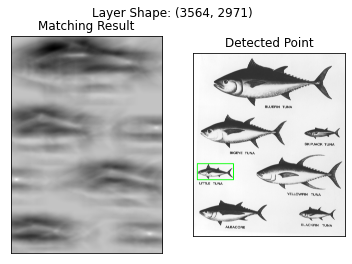

Layer Shape: (1782, 1486)


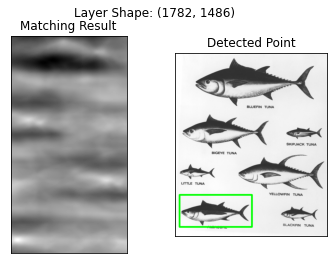

Layer Shape: (891, 743)


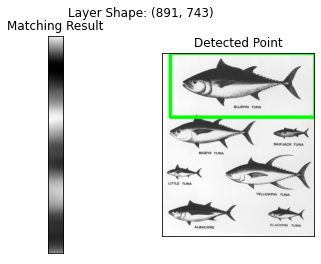

break for


In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def pyramid_bf(image, l=5, minSizex=8, minSizey=8):
    level = 0
    yield image
    while True:
        if level == l or image.shape[0] < minSizex or image.shape[1] < minSizey:
            break

        image = cv2.GaussianBlur(image,(5,5),0)
        h, w = image.shape[:2]
        image = image[:h+1:2, :w+1:2]
        yield image
        level += 1
methods=['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

def detect_object_in_pyramid(image_path, template_path):
    template = cv2.imread(template_path, 0)
    w, h = template.shape[::-1]

    # Cargar la imagen como un arreglo NumPy
    image = cv2.imread(image_path, 0)
    print(f'Image Shape: {image.shape}')
    # Generar pirámide de la imagen
    for layer in pyramid_bf(image, l=3):
        # Convertir la capa a un arreglo NumPy
        layer_np = np.array(layer)

        # Verificar dimensiones antes de la coincidencia de plantillas
        if layer_np.shape[0] < h or layer_np.shape[1] < w:
            print("break for")
            break
        
        print(f'Layer Shape: {layer_np.shape}')
        # Aplicar coincidencia de plantillas con el método cv2.TM_CCOEFF_NORMED
        method = cv2.TM_CCORR_NORMED
        res = cv2.matchTemplate(layer_np, template, method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        # Obtener ubicación de la coincidencia
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        # Dibujar rectángulo en la imagen original
        img_color = cv2.cvtColor(layer_np, cv2.COLOR_GRAY2RGB)
        cv2.rectangle(img_color, top_left, bottom_right, [0, 255, 0], 15)

        # Mostrar resultados
        plt.subplot(121), plt.imshow(res, cmap='gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122), plt.imshow(img_color, cmap='gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(f'Layer Shape: {layer_np.shape}')
        plt.show()


# Rutas de las imágenes
image_path = intro_images_path+'Tuna_Relative_Sizes.jpg'
template_path = intro_images_path+'Tuna_template.jpg'

# Llamar a la función con las rutas de las imágenes
detect_object_in_pyramid(image_path, template_path)